# AIM 5001 Final Project Proposal

# Introduce
In today’s uncertain times, people are looking to data to help determine investment ways in confronting COVID-19. From mitigating risk to gaining essential insight, data helps drive decisions. I with my analytics between COVID-19 and Real estate price (NYC, Houston and Los Angeles) can help people make the decision. I think the U.S. housing markets are most vulnerable to the impact of the Coronavirus pandemic. 

The first dataset comes from kaggle [link:](https://www.kaggle.com/headsortails/covid19-us-county-jhu-data-demographics). This dataset contains a daily updated number of reported COVID-19 cases & deaths in the US on the state and county level, as provided by the Johns Hopkins University.

The second dataset comes from Realtor [link:](https://www.realtor.com/) that has detailed real estate information that comes from MLS. [link:](http://www.mls.com/).

Through research questions, I want to analyze and illustrate correlations to COVID-19 and Housing markets as well as to response the followling questions that can help people make a buying housing decision.

The first question is does COVID-19 affects the price of the estate. To analyze it, I will choose the daily number of COVID-19 new cases and Price per Sq Ft. In this question, I will illustrate what is the correlation between these two data.

The second question is what types of houses have been most affected, Apartments, Houses, or Condos(Co-ops). I will compare the different types of houses.

The third question is should people purchase houses, should purchase what types of houses, and does the listed price is the best price?

Through data analysis, people not only can see the correlation between COVID-19 and Housing markets but also can make decisions about whether to buy a house or not to buy.

# Research Questions
For this final project, I want to study that does COVID-19 affect Real estate price, in NYC, Houston and Las Angeles? For this reason I chose the following questions.


1. Does COVID-19 affects the price of the estate?
In new york city, Many people left rented apartments during the COVID-19 pandemic and bought house property. Whether the increasing or decreasing price of the property is related to the pandemic? By analyzing two data of three main cities,(New York City, Houston, and Los Angeles), people can use results to make decisions to invest in real estate.

    
2. What types of houses have been most affected, Apartments, Houses or Condos(Co-ops)?
Because of COVID-19, the housing market has bloomed. People need bigger space to live with their family. Is it true that of all the types of property, only houses have gone up in price? Data analysis can help people find A valuable type of property to invest in?


3. Should people purchase houses(Apartment, Houses or Condos) now?
Is the impact of COVID-19 on housing temporary or long-term?Have property prices been rising since the beginning of the pandemic?If the rise is what kind of house?People can make rational decisions based on data analysis and decide whether they need to buy a certain type of house.

# Data to be Used

I will use two datasets.

The first dataset is a daily updated number of reported COVID-19 cases & deaths in the US on the state, as provided by the Johns Hopkins University. The COVID-19 dataset covid_us_county.csv and Column Description can be found on page [link](https://www.kaggle.com/headsortails/covid19-us-county-jhu-data-demographics). I will download the dataset as csv by python.

- COVID-19 data sample:

| fips | county | state | lat | long | date | cases | state_code | deaths|
| :--- | :--- | :--- | :--- |  :--- | :--- | :--- | :--- | :--- |
| 101 | Houston | Texas| 32.53952 | -86.64408 | 2020-01-22 | 0 | TX | 0 |
| 1001| Hudson | Texas| 32.53952745 | -86.64408227 | 2020-04-26 | 37 |  TX | 1 |


The second dataset is housing market data scraped from Realtor [link:](https://www.realtor.com/). After scraping housing data, I will save them into the PostgreSql database.

- To scrape what type of data
    - To scrape 3 data of real estate of cities (NYC, Houston and Los Angeles).
    - To scrape 3 types of houses (Apartments, Houses and Condos(Co-ops))
    - To scrape 20 items for each type of houses in each city.
    - To scrape houses history listed prices, sold information and latest listed prices.


- Houses data table sample:

| county | state | house type | listed price before 2020 (Price/sqft) | listed date before 2020 | price sold in 2020 (Price/sqft) | sold date in 2020 | latest listed price in 2020 (Price/sqft) | latest listed date in 2020 | 
| :--- | :--- | :--- | :--- | :--- | :--- | :--- | :--- | :--- |
|New York|New York| apt | 100,000|  01/25/2019 | 120,000 |  07/25/2020 | 140,000 | 11/13/2020 |
|New York|New York | condos | 80,000|  04/04/2019 | 90,000 |  07/25/2020 | 115,000 | 11/08/2020 |
|Los Angeles|California | house | 200,000|  03/18/2019  | 190,000 |  08/11/2020 | 115,000 | 11/01/2020 |
| Houston|Texas | condos | 100,000|  10/25/2019  | 102,000 |  09/22/2020 | 115,000 | 10/25/2020 |

# Approach

- Data management
    - Using PostgreSQL databases to store the data of real estate.


- Statistical analysis
    - In the EDA part, I will use clearing data, description, hist chart and correlation to clean and realize these two dataset. In response to my pervious questions, I will choose appropriate columns to analyze.
    
    - To get a reasonable statistical analysis, I will choose appropriate columns and use appropriate figures to response my pervious questions.
        - Using line chart to illustrate the change of the columns for these 2 dataset. Like, to illustrate the new COVID-19 cases per day, and the average property price changes in the 3 cities. 
        - Using hist, box chart to show the concentration of Price/sqft.
        - Using scattor chart to find the correlation between Price/sqft and the number of comfirmed COVID-19.
        
    - To find the correlation and regression of two datasets, I will use heatmap and scattor with regression line to illustrate results clearly.


- New feature
    - I want to draw a US map that shows the percentage of housing going up with different colors for 3 cities (NYC, Houston, and Los Angeles). The map lib is [link](https://pypi.org/project/folium/). For example, if NYC has the highest percentage of property increases in 3 cities, the map of NYC will show red.

# Reference
www.kaggle.com. COVID-19 US County JHU Data & Demographics. [online] Available at:https://www.kaggle.com/headsortails/covid19-us-county-jhu-data-demographics [Accessed 13 November 2020].


https://pypi.org/. folium 0.11.0 [online] Available at:https://pypi.org/project/folium/ [Accessed 13 November 2020].


www.realtor.com/. Real estate online platform. [online] Available at:www.realtor.com/ [Accessed 13 November 2020].


https://magazine.realtor. A magazine of real estate. [online] Available at: https://magazine.realtor/news-and-commentary/feature/covid-19-s-impact-on-real-estate [Accessed 13 November 2020].

In [1]:
# first import libs
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import psycopg2

In [3]:
# To read the COVID-19 data from github and get the DataFrame.
# covid_file = "https://raw.githubusercontent.com/Yuehao-Wang/AIM-5001/master/data/covid_us_county.csv"
covid_file = r"D:\yeshiva\1 semester\Data Acquisition and Management CRN 13255\Final Project/covid_us_county.csv"
covid_all_df = pd.read_csv(covid_file)

# To see the head of data set
covid_all_df.head(5)

,fips,county,state,lat,long,date,cases,state_code,deaths
0,1001.0,Autauga,Alabama,32.539527,-86.644082,2020-01-22,0,AL,0
1,1001.0,Autauga,Alabama,32.539527,-86.644082,2020-01-23,0,AL,0
2,1001.0,Autauga,Alabama,32.539527,-86.644082,2020-01-24,0,AL,0
3,1001.0,Autauga,Alabama,32.539527,-86.644082,2020-01-25,0,AL,0
4,1001.0,Autauga,Alabama,32.539527,-86.644082,2020-01-26,0,AL,0


In [13]:
# choose NYC, Houston, and Los Angeles
covid_3cities_df = covid_all_df[((covid_all_df.county == 'Houston') & (covid_all_df.state == 'Texas'))
                               | ((covid_all_df.county == 'Los Angeles') & (covid_all_df.state == 'California'))
                               | ((covid_all_df.county == 'New York') & (covid_all_df.state == 'New York'))]

In [14]:
covid_3cities_df.shape

(951, 9)

In [15]:
covid_3cities_df.head()

,fips,county,state,lat,long,date,cases,state_code,deaths
67521,6037.0,Los Angeles,California,34.308284,-118.228241,2020-01-22,0,CA,0
67522,6037.0,Los Angeles,California,34.308284,-118.228241,2020-01-23,0,CA,0
67523,6037.0,Los Angeles,California,34.308284,-118.228241,2020-01-24,0,CA,0
67524,6037.0,Los Angeles,California,34.308284,-118.228241,2020-01-25,0,CA,0
67525,6037.0,Los Angeles,California,34.308284,-118.228241,2020-01-26,1,CA,0


<Figure size 1440x1296 with 0 Axes>

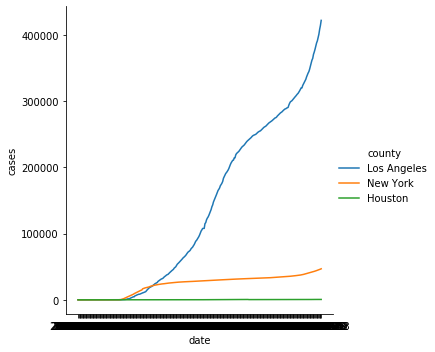

In [27]:
plt.figure(figsize = (20, 18))
sns.relplot(x="date", y="cases", hue="county", kind="line", data=covid_3cities_df);
plt.show()

<Figure size 1440x1296 with 0 Axes>

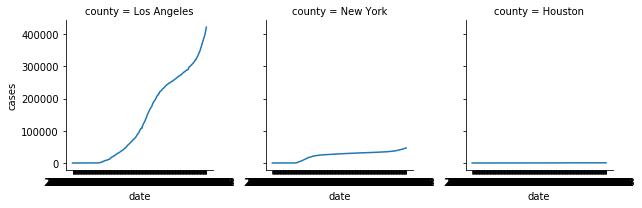

In [34]:
g = sns.FacetGrid(covid_3cities_df, col="county")
g.map(sns.lineplot, "date", "cases")

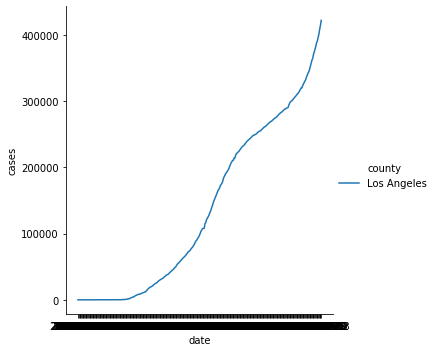

In [36]:
sns.relplot(x="date", y="cases", hue="county", kind="line", data=covid_3cities_df[covid_3cities_df.county == 'Los Angeles']);

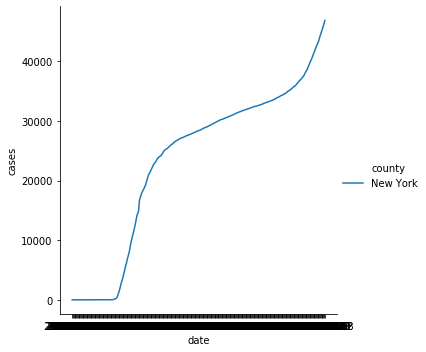

In [37]:
sns.relplot(x="date", y="cases", hue="county", kind="line", data=covid_3cities_df[covid_3cities_df.county == 'New York']);

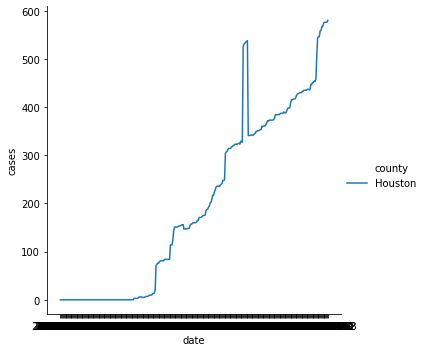

In [35]:
sns.relplot(x="date", y="cases", hue="county", kind="line", data=covid_3cities_df[covid_3cities_df.county == 'Houston']);

# housing price data
- scrape
- insert into postgresql
- load, clean, fill

In [4]:
# connect postgresql
def get_postgresql_connect():
    conn = psycopg2.connect(host="127.0.0.1",user="postgres",password="123456",database="aim_new_final")
    return conn

def query_houses():
    
    conn= get_postgresql_connect()
    cur = conn.cursor()
    sql = " select * from three_prices "
    cur.execute(sql)
    
    rows = cur.fetchall()
        
    conn.close()
    
    return rows

house_tuples = query_houses()

In [7]:
house_df = pd.DataFrame(house_tuples, columns =["property_id", "newest price date", "newest price(price/sqft)", 
                                                "2nd price date", "2nd price(price/sqft)", "oldest price date", 
                                                "oldest price(price/sqft)", "county", "state", "prop_type"]) 
  
house_df.head(3)  

,property_id,newest price date,newest price(price/sqft),2nd price date,2nd price(price/sqft),oldest price date,oldest price(price/sqft),county,state,prop_type
0,O1000007648,2020-12-10,378.63,2020-10-29,378.63,2020-10-20,371.87,Los Angeles,California,multi_family
1,O1028836967,2020-12-11,722.56,2020-10-24,714.29,2020-10-24,714.29,Los Angeles,California,single_family
2,O1032600397,2020-12-11,613.34,2020-10-28,627.69,2020-10-16,627.69,Los Angeles,California,condo


In [28]:
house_df['newest price(price/sqft)'] = house_df['newest price(price/sqft)'].astype('float')
house_df['2nd price(price/sqft)'] = house_df['2nd price(price/sqft)'].astype('float')
house_df['oldest price(price/sqft)'] = house_df['oldest price(price/sqft)'].astype('float')

In [29]:
house_df.dtypes

property_id                  object
newest price date            object
newest price(price/sqft)    float64
2nd price date               object
2nd price(price/sqft)       float64
oldest price date            object
oldest price(price/sqft)    float64
county                       object
state                        object
prop_type                    object
dtype: object

In [30]:
house_df.describe()

,newest price(price/sqft),2nd price(price/sqft),oldest price(price/sqft)
count,172.000000,172.000000,172.000000
mean,537.570058,551.909012,575.710174
std,479.395974,490.494637,511.967694
min,82.060000,74.540000,55.640000
25%,285.555000,308.372500,297.670000
50%,423.860000,432.045000,448.850000
75%,634.047500,649.012500,690.562500
max,3706.850000,4115.040000,4115.040000


<Figure size 1152x864 with 0 Axes>

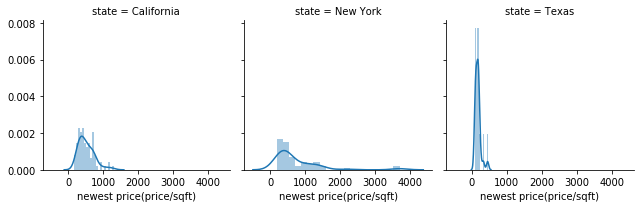

In [14]:
plt.figure(figsize = (16, 12))
g = sns.FacetGrid(house_df, col="state")
g.map(sns.distplot, "newest price(price/sqft)", bins= 20)
plt.show()

DataError: No numeric types to aggregate

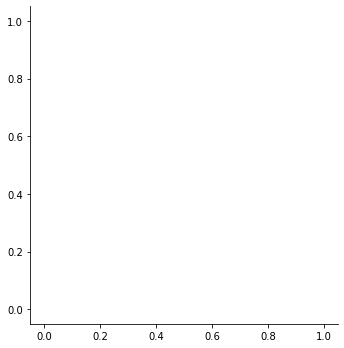

In [21]:
sns.relplot(x="newest price date", y="newest price(price/sqft)", hue="county", kind="line", 
            data=house_df[house_df.county == 'Houston']);

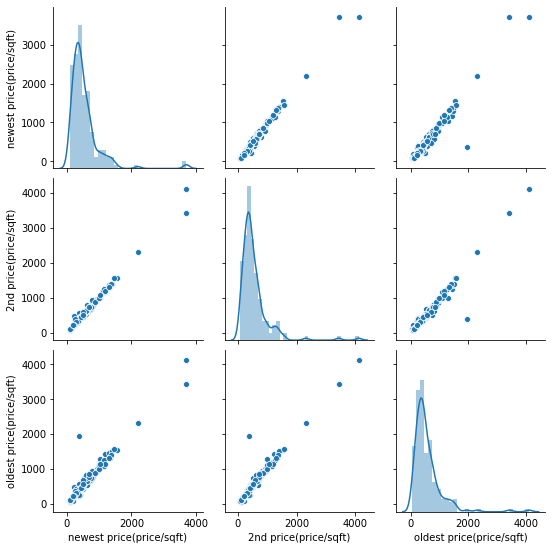

In [15]:
g = sns.PairGrid(house_df)
g.map_diag(sns.distplot)
g.map_offdiag(sns.scatterplot)

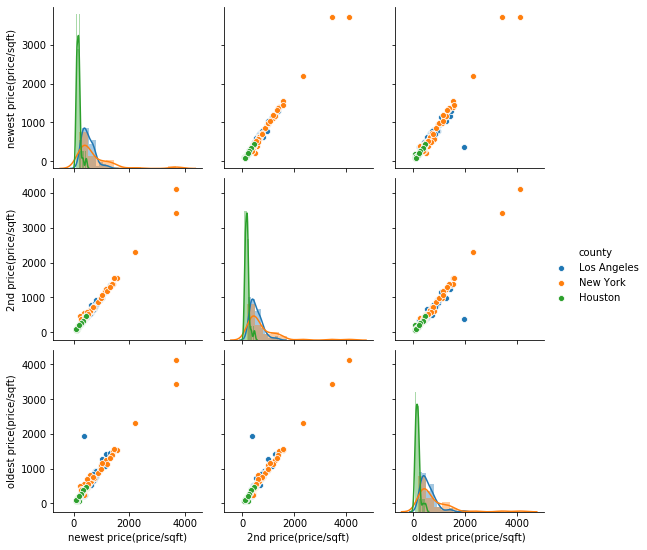

In [16]:
g = sns.PairGrid(house_df, hue="county")
g.map_diag(sns.distplot)
g.map_offdiag(sns.scatterplot)
g.add_legend()

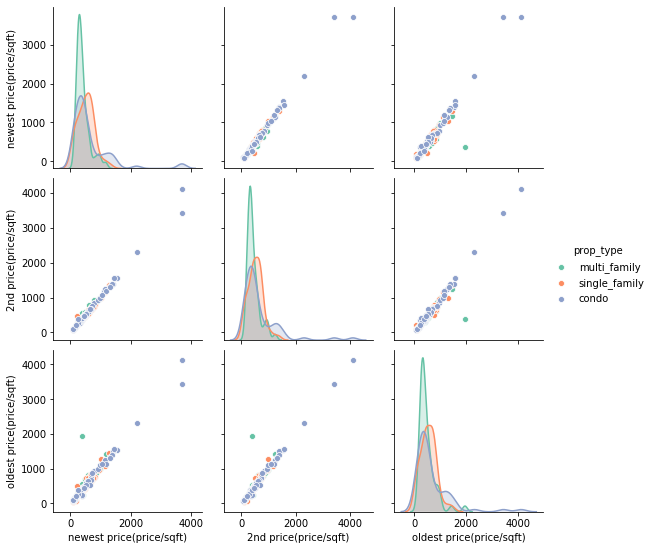

In [18]:
g = sns.pairplot(house_df, hue="prop_type", palette="Set2", diag_kind="kde", height=2.5)